### Exploring evolutionary strategies for defining Acoustic Black Holes 

An acoustic black hole (ABH) is a technique that aims to reduce vibration of a certain wave in a thin-walled structure, i.e a duct termination

To do that, we can explore  the usage of multiple concurrent layers with different morphologies that enhances the reduction of the wave speed. In ideal scenarios this speed would be decreased to zero but in real world scenarios it never vanishes.  


Considering the usage of ABH in duct terminations, a common morphology is to use a set of concentric rings with power-law decreasing radius. See below: 

<img src="src/abh.jpg">

You can learn more about ABH [our blog ](https://blogs.salleurl.edu/en/acoustic-black-hole-duct-termination-realization-metafluid)

In this notebook, we'll use different evolutionary approaches to learn morphologies that help to reduce the speed of an incoming wave. We'll consider some already known morphologies and compare how similar are the proposed morphologies. We'll consider:

- Linear Equation
- Quadratic Equation


The algorithms tested will be the following: 

- CMA
- Novelty Search
- Map Elites

### ABH solutions
We define two known morphologies for duck terminations

In [58]:

def linearEquation(parameters):
    distTruncation = 3
    ringSeparation = 3
    solution = []
    for i in range(parameters):
        solution.append(2*i*ringSeparation+distTruncation)
    return solution

def quadraticEquation(parameters):
    distTruncation = 3
    ringSeparation = 3
    solution = []
    for i in range(parameters):
        solution.append(i*i*ringSeparation+distTruncation)
    return solution

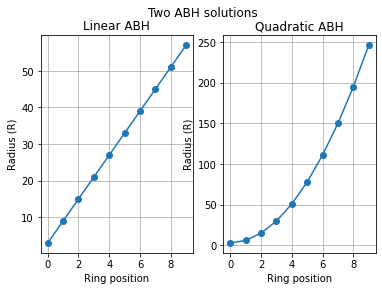

In [59]:
import matplotlib
import matplotlib.pyplot as plt

totalRings = 10
solution = linearEquation(totalRings)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Two ABH solutions')
ax1.plot(solution,'o-')

ax1.set(xlabel='Ring position', ylabel='Radius (R)',
       title='Linear ABH')
ax1.grid()

solution = quadraticEquation(totalRings)
ax2.plot(solution,'o-')
ax2.set(xlabel='Ring position', ylabel='Radius (R)',
       title='Quadratic ABH')
ax2.grid()

In [82]:
import math
import numpy as np


def evaluate(candidates, target, showPlot, title, order):
    solutions = []
    fitNormal = []
    for i in range(len(candidates)):
        fit = np.square(np.subtract(target,candidates[i])).mean()  
        element = {
            "value":candidates[i],
            "fit": fit
        }
        fitNormal.append(fit);
        solutions.append(element)
    
    newList = sorted(solutions, key=itemgetter('fit'), reverse = False)
    if np.mean(fitNormal) < 0.05:
        end = True
        plot = True
    else:
        end = False
    if showPlot is True:
        x = []
        y = []
        fig, ax = plt.subplots()
        fig.suptitle(title)
       
        for candidate in candidates:
            ax.plot(candidate, color='tab:blue', linestyle='dashed',linewidth=0.5)
        ax.plot(candidates[0], color='tab:green', linestyle='dashed', linewidth=3, marker='o')
        ax.plot(target, color='tab:red', linestyle='dashed', linewidth=2, marker='o')
        ax.set(xlabel='Ring position', ylabel='Radius (R)', title='Quadratic ABH')
        ax.set_xlim(-1, len(target))
        ax.set_ylim((-1, int(target[len(target)-1]+target[len(target)-1]*0.5)))
        fig.show()
    best = []
    fitness = []

    for i in range(0,len(newList)):
        fitness.append(newList[i]["fit"])
        best.append(newList[i]["value"])
    return best,fitness,end



In [94]:
class Solver:
    def __init__(self,rings):
        self.population = 500
        self.initialMeans = np.zeros(rings)
        self.initialSigma = 1
        self.es = cma.CMAEvolutionStrategy(self.initialMeans, self.initialSigma, {'popsize': self.population})
        self.candidates = self.es.ask()
        
    def ask(self):
        return self.es.ask()
   
    def tell(self,best,fitness):
        self.es.tell(best,fitness)
    

[3, 9, 15, 21, 27, 33, 39, 45, 51, 57]
(250_w,500)-aCMA-ES (mu_w=128.6,w_1=2%) in dimension 10 (seed=480235, Fri May  7 12:44:17 2021)


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1196.9591701879465


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1170.989958580214


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1108.177512343233


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


989.0726984927952


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


923.6061487260586


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1141.1376384654648


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


428.31661037180936


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


215.2488362610055


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


139.04573432909254


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


74.11711815983706


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


43.41758608346383


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


23.9353704524609


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


13.448257726575626


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


6.730531974798894


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


2.903869860997327


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.5105839964929457


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.7698816970790137


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.3981767122018582


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.2264382636343729


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-82-1a54b15b7755>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


0.11340736298735322


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.05656448069717448


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.027588361147056116


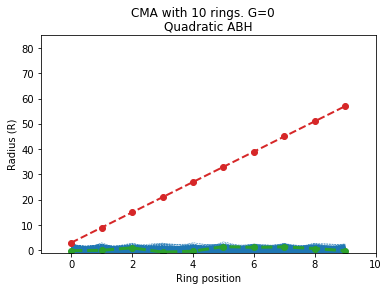

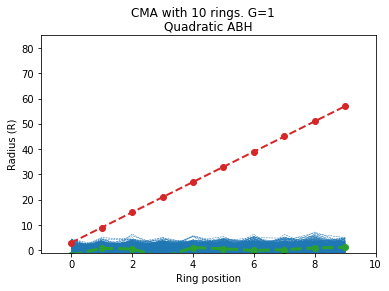

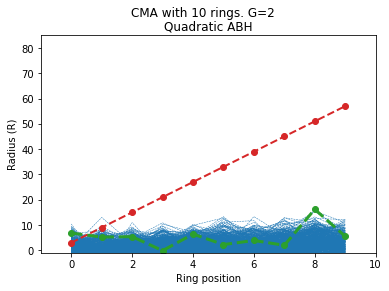

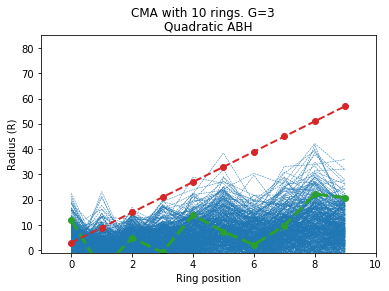

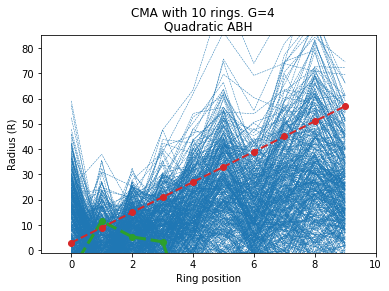

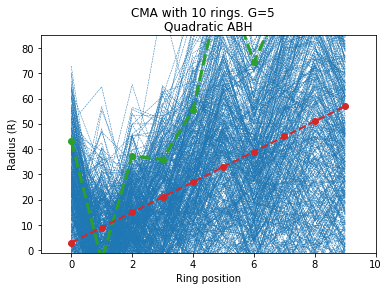

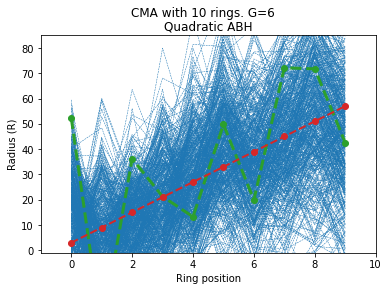

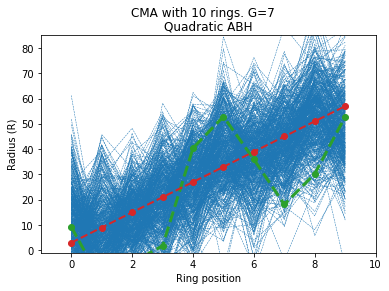

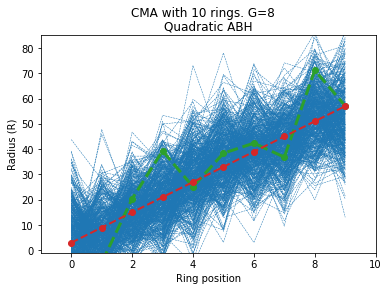

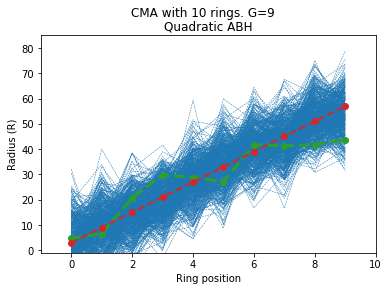

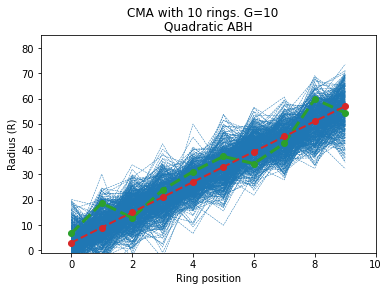

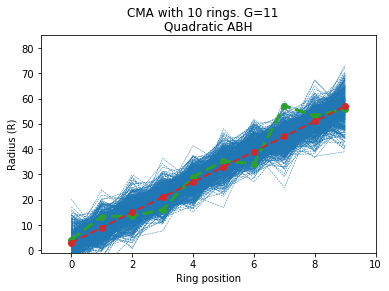

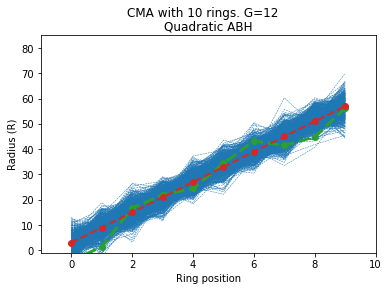

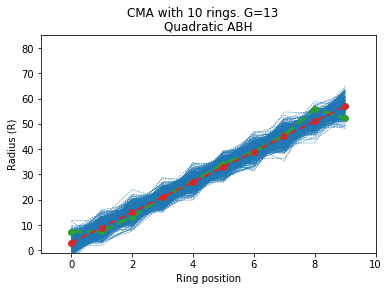

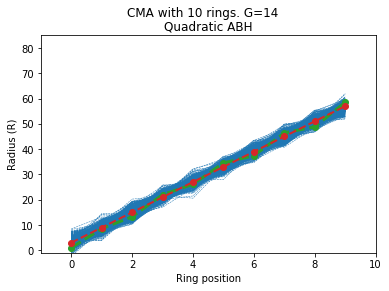

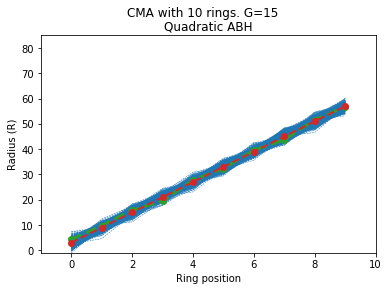

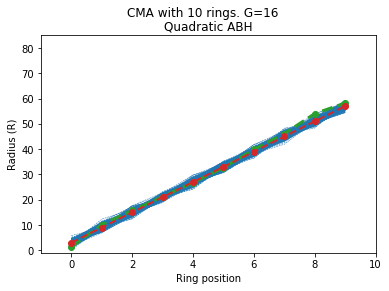

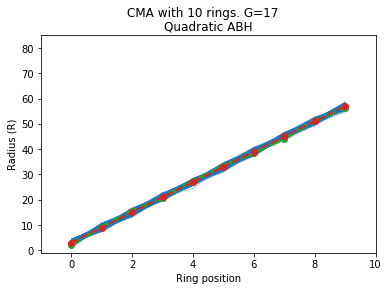

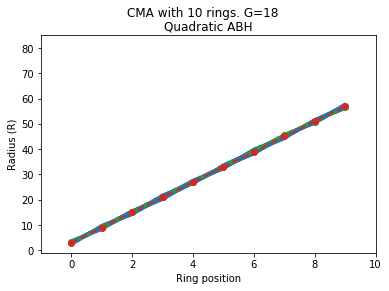

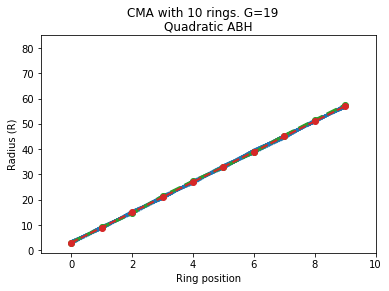

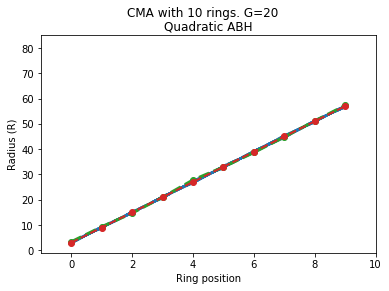

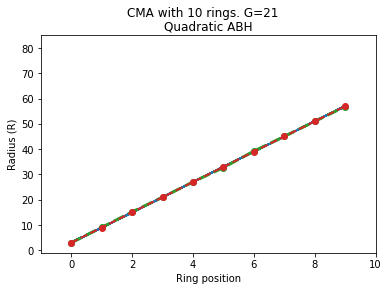

In [95]:
import cma
from operator import itemgetter
def testCMA(showEvolution):
    end = False
    totalRings = 10
    targetSolution = linearEquation(totalRings)
    print(targetSolution)
    population = 500
    initialMeans = np.zeros(totalRings)
    initialSigma = 1
    
    es = Solver(totalRings)
    candidatesI = es.ask()
   
    gen = 0
    
    generationalBest = []
    generationalMeanFit = []
    while not (end):
        
        bestI,fitness,end = evaluate(candidatesI,targetSolution,showEvolution, "CMA with " +str(totalRings) + " rings. G="+ str(gen), False)
        es.tell(bestI,fitness)
        candidatesI = es.ask()
        
        generationalBest.append(fitness[len(fitness)-1])
        generationalMeanFit.append(np.mean(fitness))
        print(np.mean(fitness))
        gen += 1

testCMA(True)

[3, 9, 15, 21, 27, 33, 39, 45, 51, 57]
(250_w,500)-aCMA-ES (mu_w=128.6,w_1=2%) in dimension 10 (seed=528021, Fri May  7 11:24:38 2021)


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1198.719786543381


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1175.552934272956


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1108.9164971353132


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


969.3991036524759


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


879.9692700492049


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1068.1850087661749


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


343.801889112663


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


183.47176487042728


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


103.56221799702263


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


60.13785768769814


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


32.54369524195211


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


15.461457418564946


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


7.929407380205244


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


4.09465911113029


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.926060951856498


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.1220808725862013


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.5659170378675951


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.2750867431315913


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.15288957432203443


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-82-1a54b15b7755>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


0.0730359348781226


<ipython-input-82-1a54b15b7755>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.03810002130242395


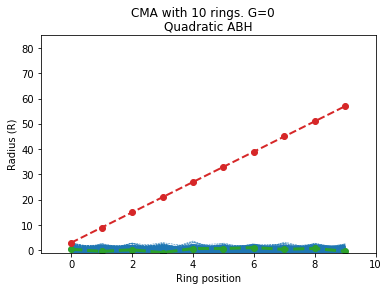

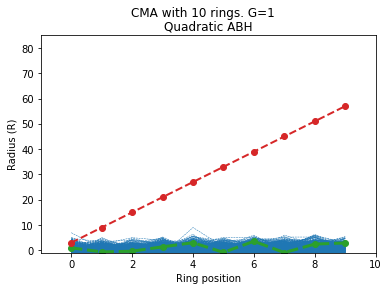

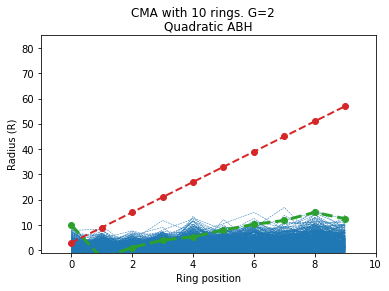

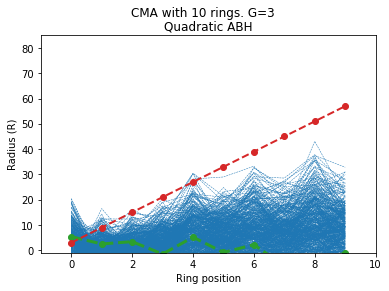

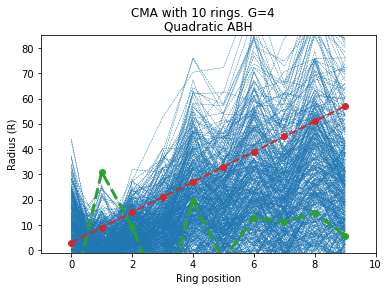

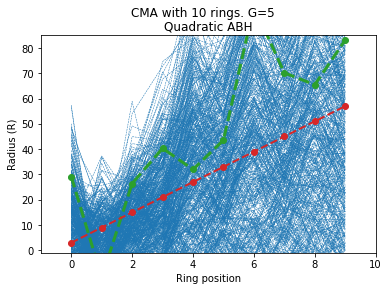

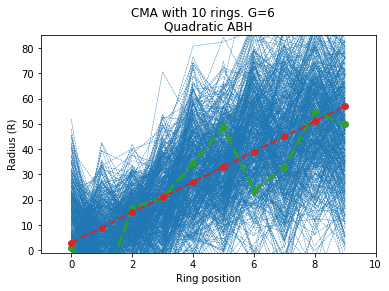

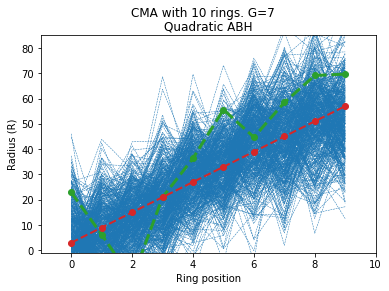

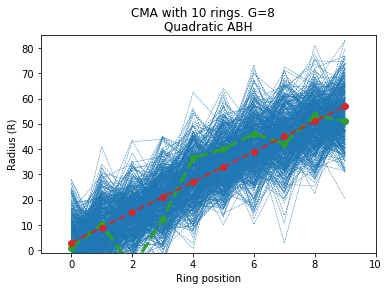

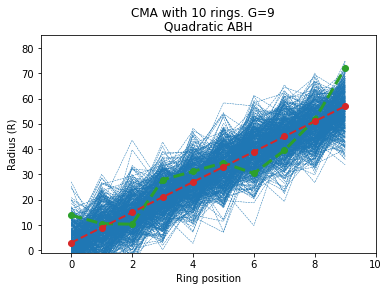

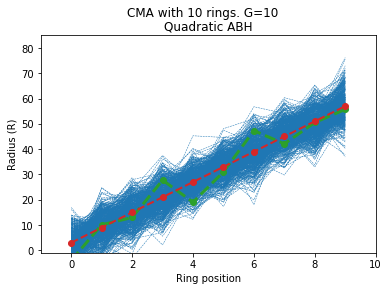

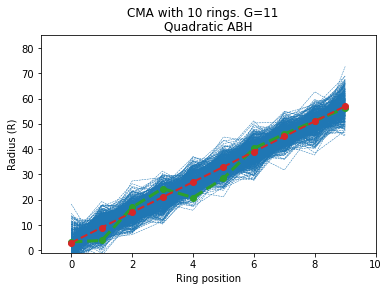

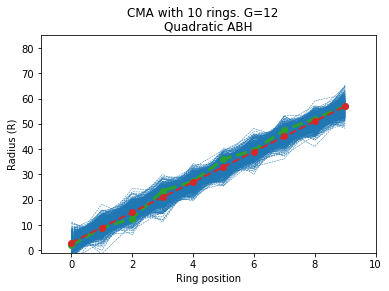

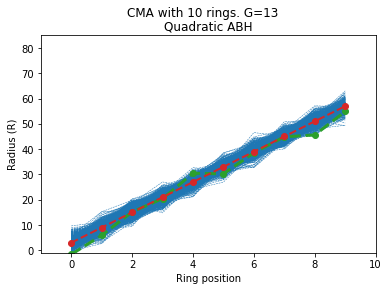

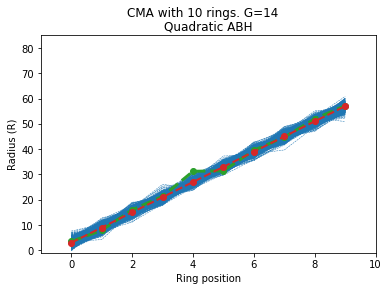

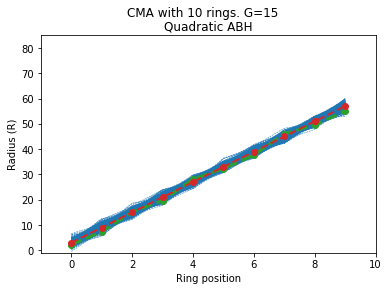

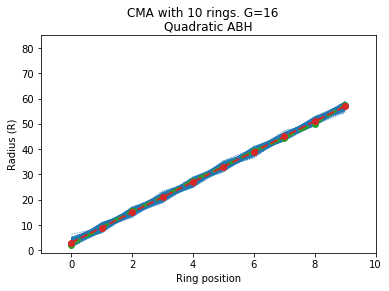

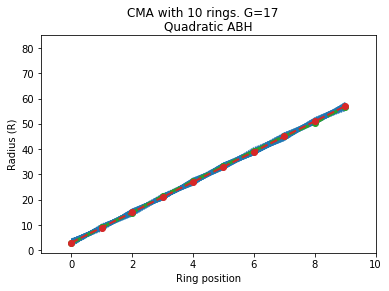

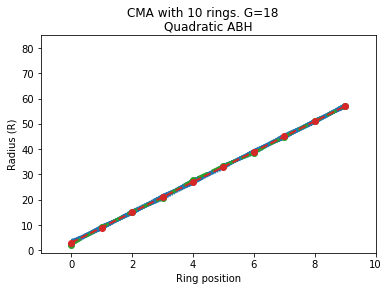

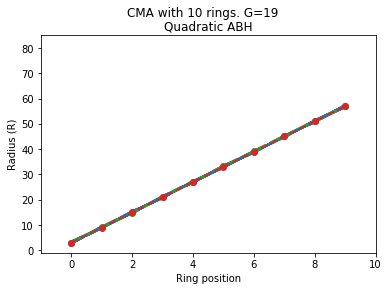

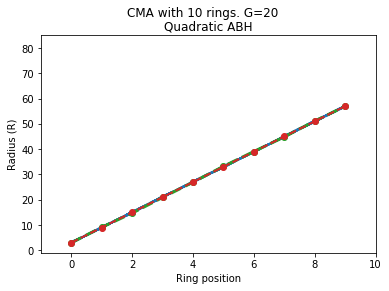

In [83]:
import cma
from operator import itemgetter
def testCMA(showEvolution):
    end = False
    totalRings = 10
    targetSolution = linearEquation(totalRings)
    print(targetSolution)
    population = 500
    initialMeans = np.zeros(totalRings)
    initialSigma = 1
    
    es = cma.CMAEvolutionStrategy(initialMeans, initialSigma, {'popsize': population})
    candidatesI = es.ask()
   
    gen = 0
    
    generationalBest = []
    generationalMeanFit = []
    while not (end):
        
        bestI,fitness,end = evaluate(candidatesI,targetSolution,showEvolution, "CMA with " +str(totalRings) + " rings. G="+ str(gen), False)
        es.tell(bestI,fitness)
        candidatesI = es.ask()
        
        generationalBest.append(fitness[len(fitness)-1])
        generationalMeanFit.append(np.mean(fitness))
        print(np.mean(fitness))
        gen += 1

testCMA(True)